Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

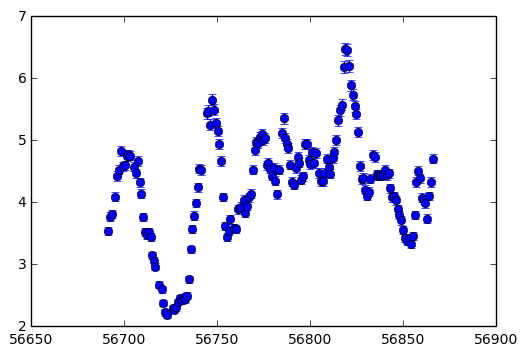

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm
from scipy.optimize import curve_fit
import numpy.fft

ref_file="lc/1367A.lc"
echo_file="lc/4368A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

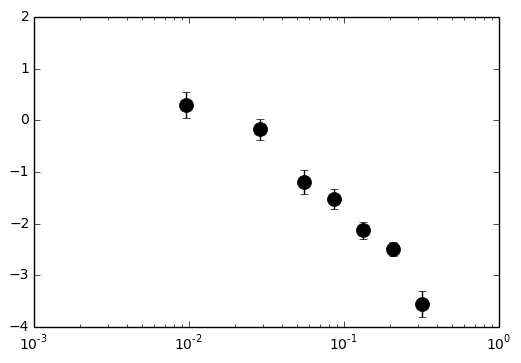

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

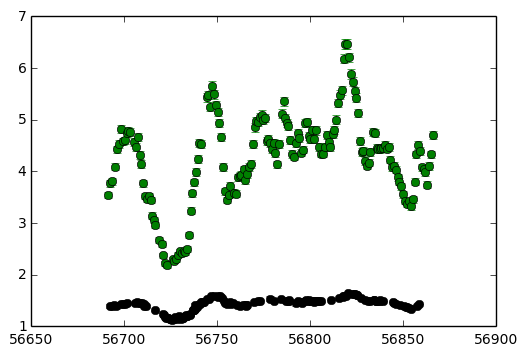

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.361e-01 5.503e+01 inf -- -2.230e+02 -- 1 1 1 1 1 1 1 1
   2 7.719e-01 5.459e+01 6.638e+01 -- -1.566e+02 -- 0.578708 0.567444 0.565767 0.565645 0.565269 0.564635 0.565645 0.563945
   3 3.383e+00 5.393e+01 6.562e+01 -- -9.097e+01 -- 0.185507 0.1439 0.132758 0.130601 0.130916 0.129667 0.131085 0.12865
   4 1.445e+00 5.277e+01 6.426e+01 -- -2.671e+01 -- -0.142659 -0.257806 -0.298121 -0.305924 -0.303305 -0.305147 -0.304059 -0.306574
   5 5.917e-01 5.083e+01 6.196e+01 -- 3.525e+01 -- -0.348804 -0.608981 -0.725147 -0.744945 -0.737788 -0.740133 -0.740511 -0.742464
   6 3.723e-01 4.792e+01 5.867e+01 -- 9.392e+01 -- -0.417419 -0.869413 -1.14636 -1.18533 -1.17119 -1.17501 -1.17867 -1.1784
   7 2.715e-01 4.436e+01 5.444e+01 -- 1.484e+02 -- -0.421165 -1.0235 -1.55636 -1.61922 -1.59707 -1.60795 -1.61745 -1.61028
   8 3.575e-01 4.073e+01 4.955e+01 -- 1.979e+02 -- -0.374308 -1.10343 -1.93497 -2.03239 -2.00811 -2.03747 -2.05653 -2.03339
   9 5.926e-01 3.677e+01 4.460e+01 -- 2.425e+02 -- -0.24050

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 3.357e+02 3.353e+02 8.433e-02 3.123e-01 0.809 +++
+++ 3.357e+02 3.349e+02 8.433e-02 4.263e-01 1.68 +++
+++ 3.357e+02 3.351e+02 8.433e-02 3.693e-01 1.21 +++
+++ 3.357e+02 3.352e+02 8.433e-02 3.408e-01 1.01 +++
	### errors for param 1 ###
+++ 3.357e+02 3.353e+02 -1.121e+00 -9.103e-01 0.833 +++
+++ 3.357e+02 3.349e+02 -1.121e+00 -8.050e-01 1.76 +++
+++ 3.357e+02 3.351e+02 -1.121e+00 -8.576e-01 1.26 +++
+++ 3.357e+02 3.352e+02 -1.121e+00 -8.839e-01 1.04 +++
+++ 3.357e+02 3.353e+02 -1.121e+00 -8.971e-01 0.933 +++
+++ 3.357e+02 3.353e+02 -1.121e+00 -8.905e-01 0.985 +++
+++ 3.357e+02 3.352e+02 -1.121e+00 -8.872e-01 1.01 +++
+++ 3.357e+02 3.352e+02 -1.121e+00 -8.889e-01 0.998 +++
	### errors for param 2 ###
+++ 3.357e+02 3.353e+02 -2.635e+00 -2.352e+00 0.888 +++
+++ 3.357e+02 3.348e+02 -2.635e+00 -2.211e+00 1.91 +++
+++ 3.357e+02 3.351e+02 -2.635e+00 -2.282e+00 1.36 +++
+++ 3.357e+02 3.352e+02 -2.635e+00 -2.317e+00 1.11 +++
+++ 3.357e+02 3.352e+02 -2.635e+00 -2.

<Container object of 3 artists>

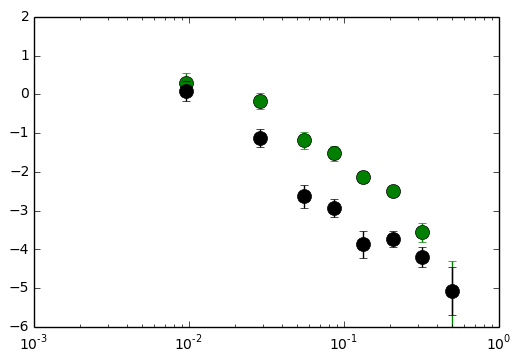

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 4.674e+03 1.067e+01 inf -- 3.891e+02 -- -0.107531 -0.949418 -2.21262 -2.52746 -3.30101 -3.40801 -4.17516 -6.83849 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 1.101e+02 1.211e+01 2.423e+00 -- 3.915e+02 -- -0.0911837 -0.911368 -2.19473 -2.50464 -3.26635 -3.36119 -4.17858 -6.53849 0.0224314 0.13674 0.236622 0.214641 0.153941 0.141456 0.0860925 -2.65496
   5 3.499e+02 1.345e+01 2.206e+00 -- 3.937e+02 -- -0.0745994 -0.879737 -2.17195 -2.48014 -3.23698 -3.32257 -4.18252 -6.83849 -0.0437031 0.16436 0.347414 0.307699 0.194659 0.170845 0.0713363 1.432
   7 5.441e+02 1.532e+01 2.037e+00 -- 3.958e+02 -- -0.0584518 -0.853102 -2.14774 -2.456 -3.21197 -3.29032 -4.1871 -7.13849 -0.100019 0.185908 0.435633 0.382521 0.226208 0.192552 0.0562607 1.59836
   9 1.849e+02 1.731e+01 1.886e+00 -- 3.977e+02 -- -0.0431336 -0.830436 -2.1241 -2.43328 -3.1906 -3.26311 -4.19225 -7.43849 -0.148048 0.203221 0.505675 0.442641 0.251144 0.209088 0.0403995 2.5906
  11 1.731e+04 1.942e+01 1.753e+00 -- 3.994e+02 -- -0.0288471

In [13]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([-6.16365918,  2.21009502,  2.28771584,  1.13110535,  0.3928378 ,
        0.21373824, -0.82743402, -0.10317688])

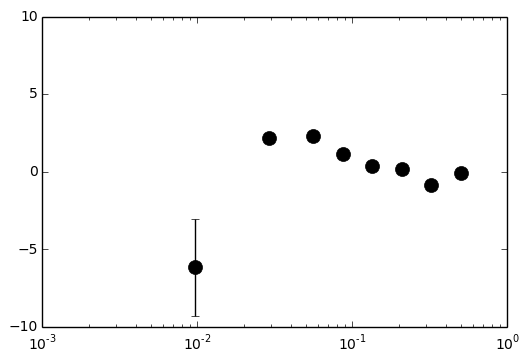

In [14]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

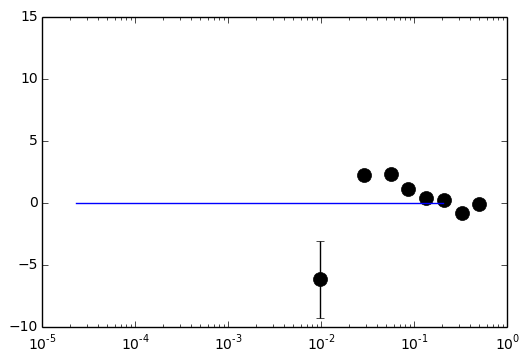

In [15]:
s, loc, scale = lognorm.fit(lag,loc=.008)

xscale('log'); ylim(-10,15)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),lognorm.pdf(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),s,loc,scale))








(-0.10734722921479302, 2.5047796344038056)

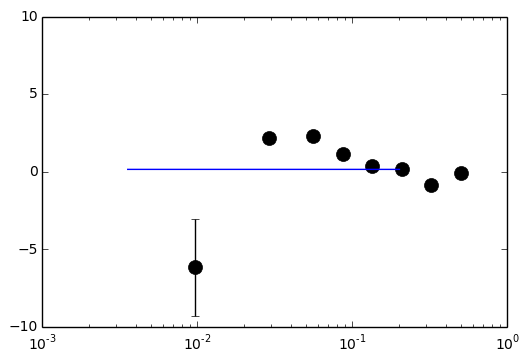

In [16]:
loc, scale = norm.fit(lag,loc=.01)

xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
plot(np.logspace(np.log(fqd[3]),np.log(fqd[-1])),norm.pdf(np.logspace(np.log(fqd[0]),np.log(fqd[-1])),loc,scale))

norm.fit(lag,loc=.01,scale=.1)

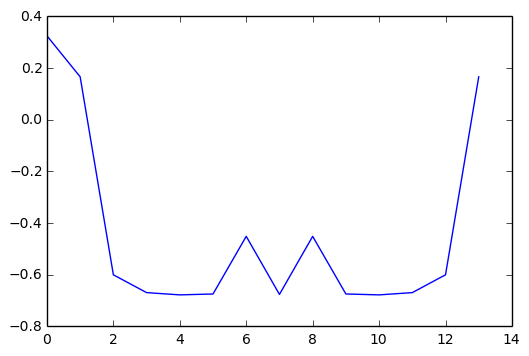

In [19]:
plot(irfft(lag))